In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [372]:
df = pd.read_csv(r"../../dataset/CarPrice_Assignment.csv")

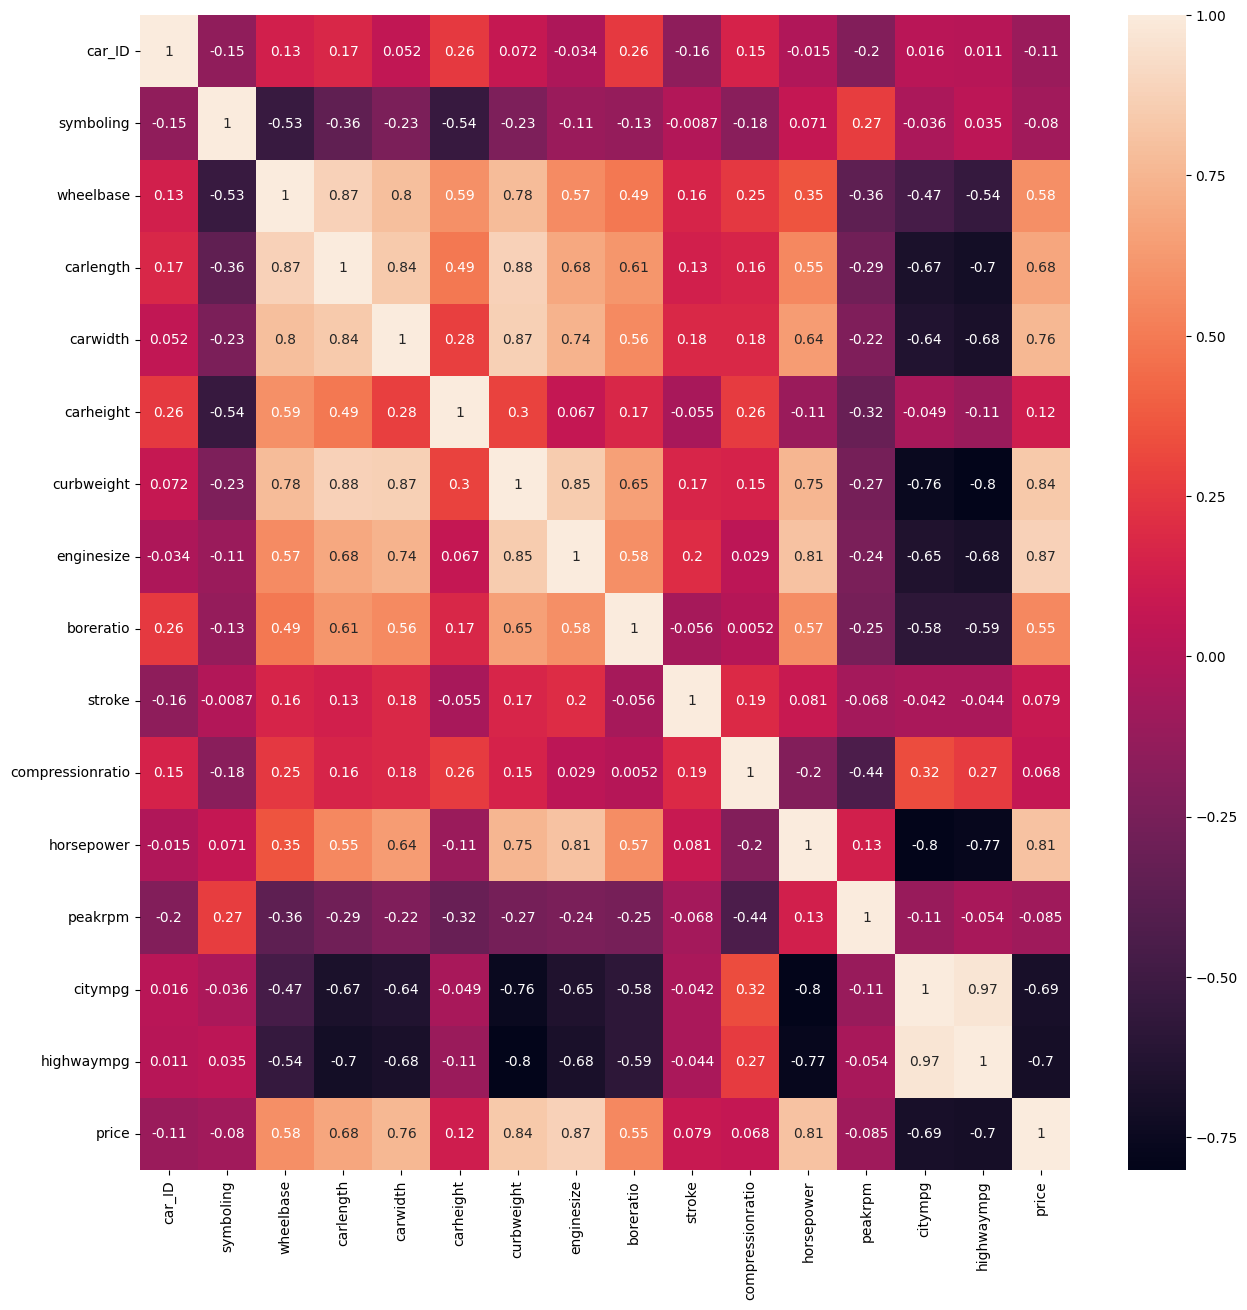

In [373]:
import seaborn as sb
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(15, 15)) 
dataplot = sb.heatmap(corr, annot=True)
plt.show()

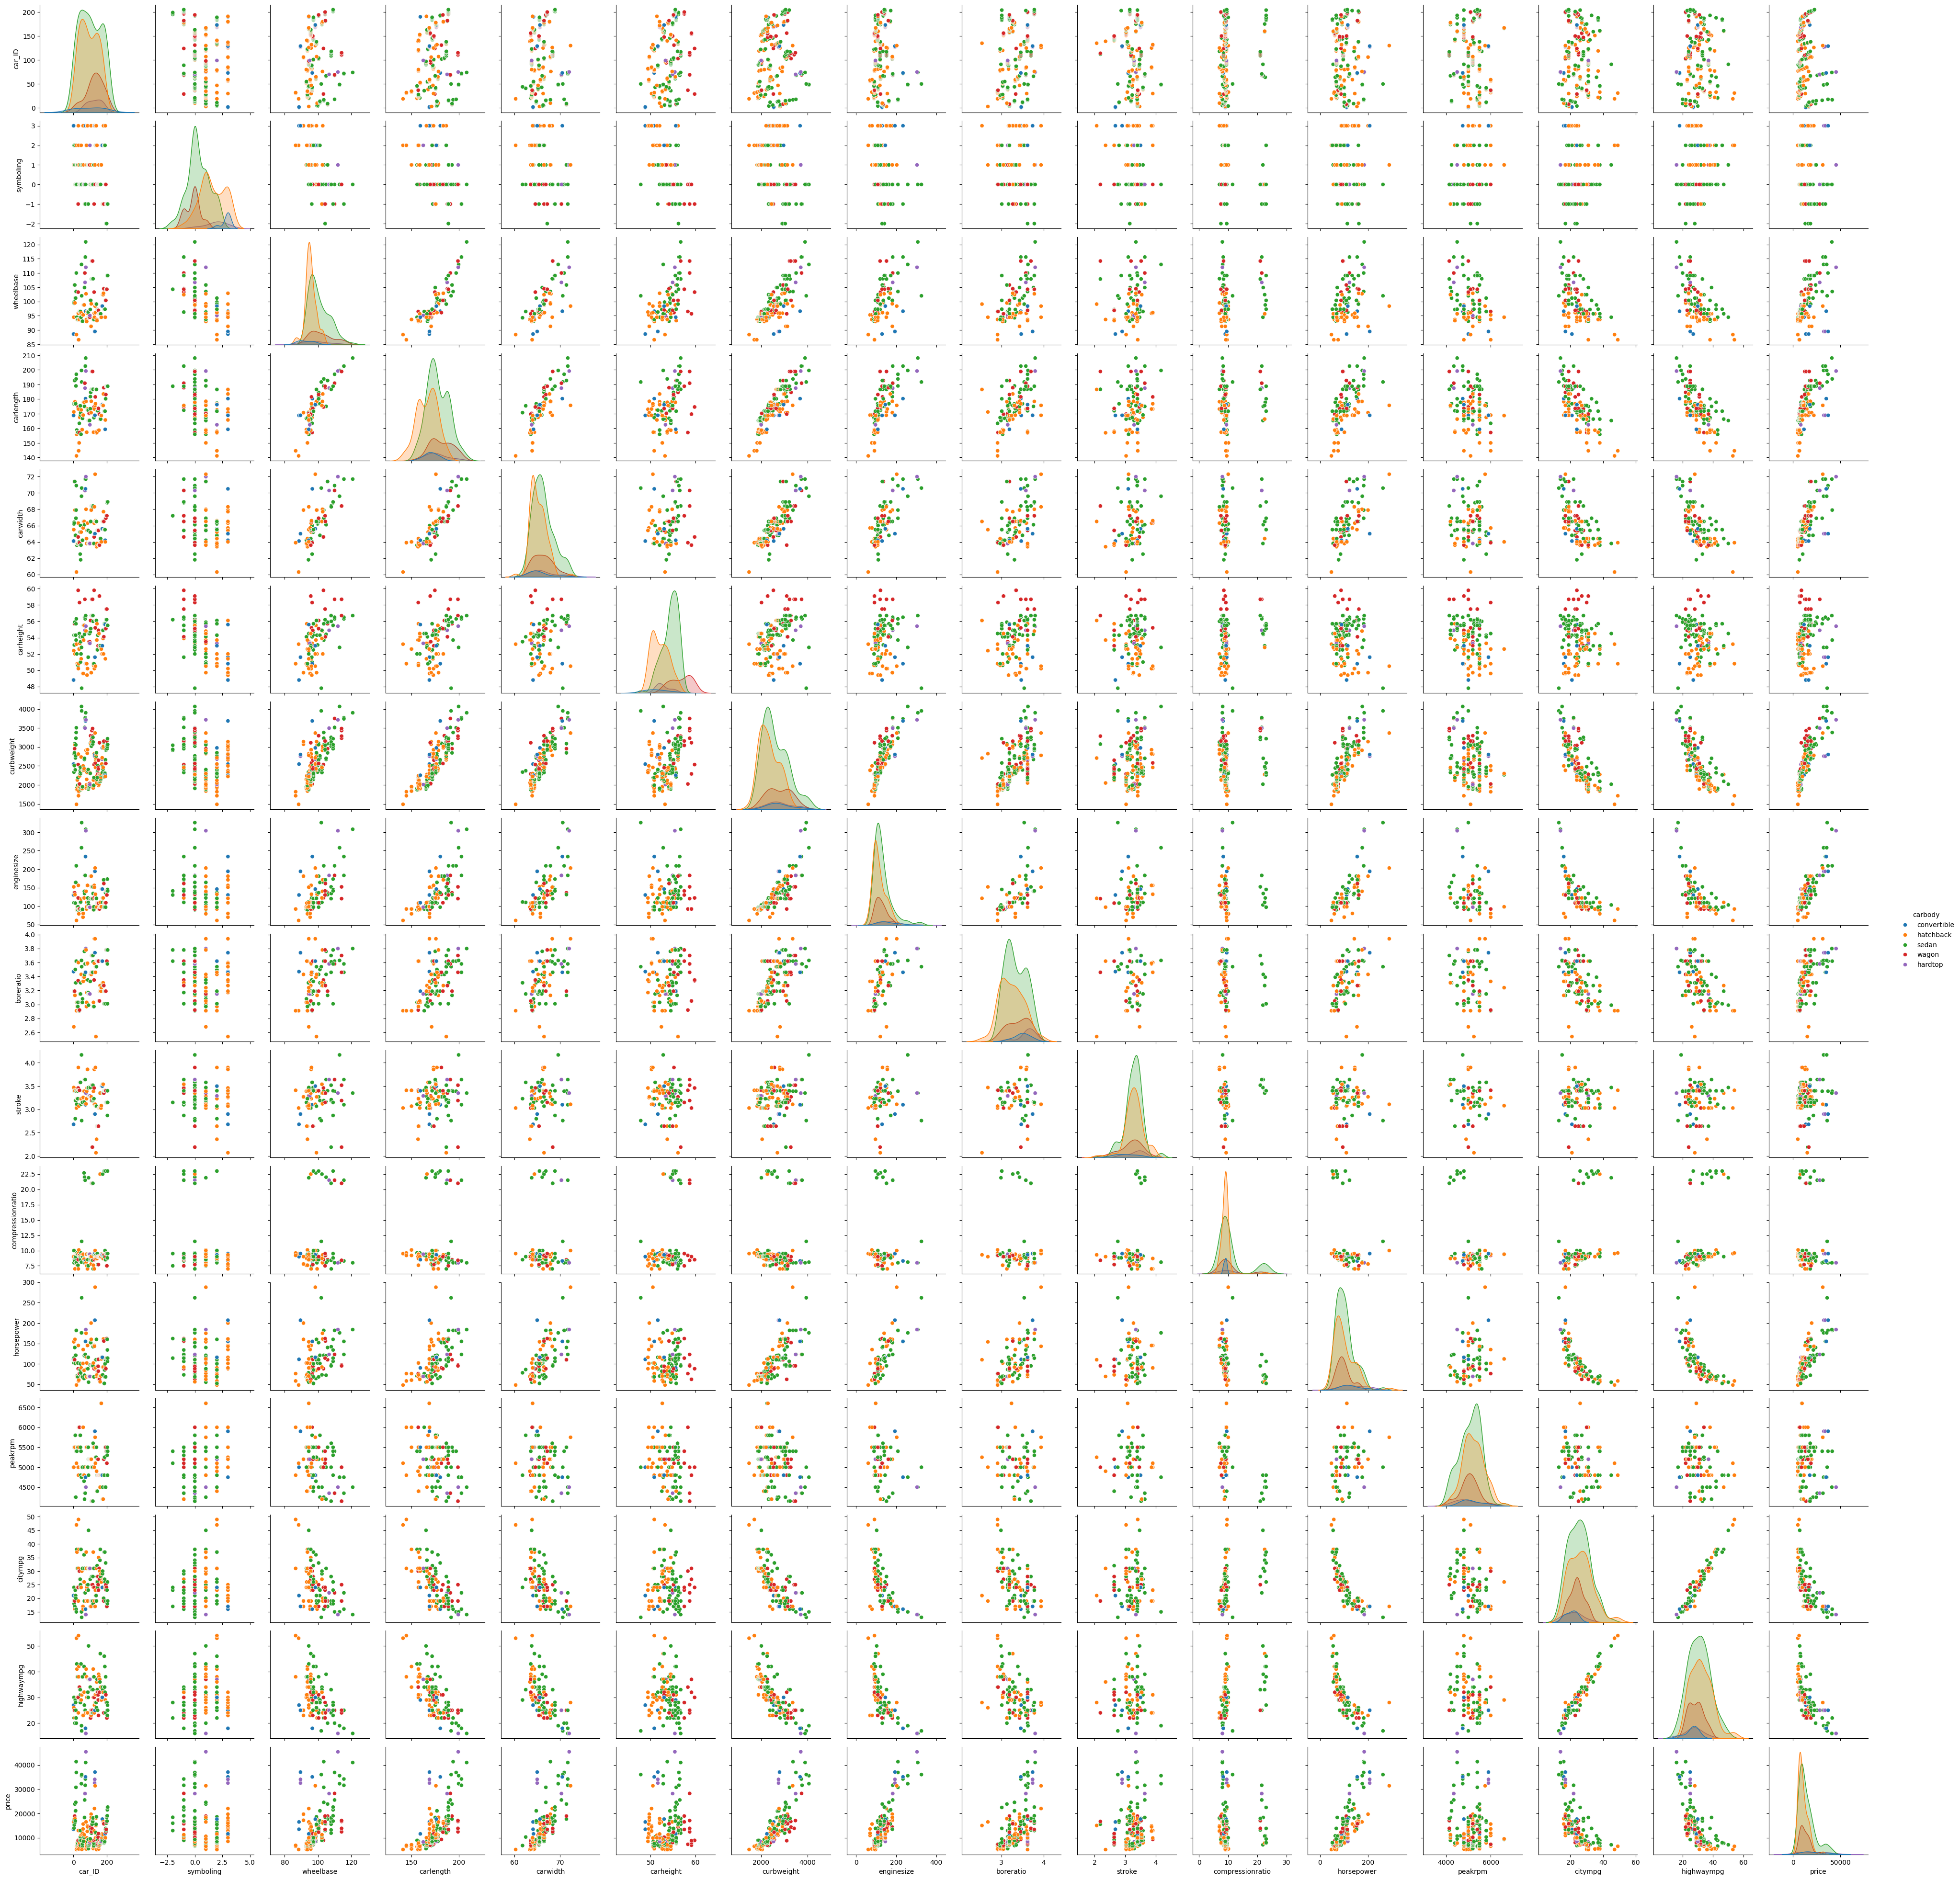

In [374]:
sb.pairplot(df, hue="carbody")

In [375]:
# df1 = df.copy()
# df1

In [376]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [377]:
def split_carname_column(dataframe, column_name):
    # Split the column into two new columns
    dataframe[['company', 'model']] = dataframe[column_name].str.split(' ', n=1, expand=True)
    return dataframe

In [378]:
df_train = split_carname_column(df_train, 'CarName')
df_train = df_train.drop(columns="CarName")
df_train

car_ID  symboling fueltype aspiration doornumber    carbody drivewheel  \
66       67          0   diesel        std       four      sedan        rwd   
111     112          0      gas        std       four      sedan        rwd   
153     154          0      gas        std       four      wagon        fwd   
96       97          1      gas        std       four      sedan        fwd   
38       39          0      gas        std        two  hatchback        fwd   
..      ...        ...      ...        ...        ...        ...        ...   
106     107          1      gas        std        two  hatchback        rwd   
14       15          1      gas        std       four      sedan        rwd   
92       93          1      gas        std       four      sedan        fwd   
179     180          3      gas        std        two  hatchback        rwd   
102     103          0      gas        std       four      wagon        fwd   

    enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
66           front      104.9      175.0  ...       3.43    3.64   
111          front      107.9      186.7  ...       3.46    2.19   
153          front       95.7      169.7  ...       3.05    3.03   
96           front       94.5      165.3  ...       3.15    3.29   
38           front       96.5      167.5  ...       3.15    3.58   
..             ...        ...        ...  ...        ...     ...   
106          front       99.2      178.5  ...       3.43    3.27   
14           front      103.5      189.0  ...       3.31    3.19   
92           front       94.5      165.3  ...       3.15    3.29   
179          front      102.9      183.5  ...       3.27    3.35   
102          front      100.4      184.6  ...       3.43    3.27   

     compressionratio horsepower peakrpm  citympg highwaympg    price  \
66               22.0         72    4200       31         39  18344.0   
111               8.4         95    5000       19         24  15580.0   
153               9.0         62    4800       31         37   6918.0   
96                9.4         69    5200       31         37   7499.0   
38                9.0         86    5800       27         33   9095.0   
..                ...        ...     ...      ...        ...      ...   
106               9.0        160    5200       19         25  18399.0   
14                9.0        121    4250       20         25  24565.0   
92                9.4         69    5200       31         37   6849.0   
179               9.3        161    5200       19         24  15998.0   
102               9.0        152    5200       17         22  14399.0   

     company           model  
66     mazda         rx-7 gs  
111  peugeot             504  
153   toyota  corona hardtop  
96    nissan           latio  
38     honda      civic 1300  
..       ...             ...  
106   nissan         clipper  
14       bmw              z4  
92    nissan           latio  
179   toyota          corona  
102   nissan            fuga  

[164 rows x 27 columns]

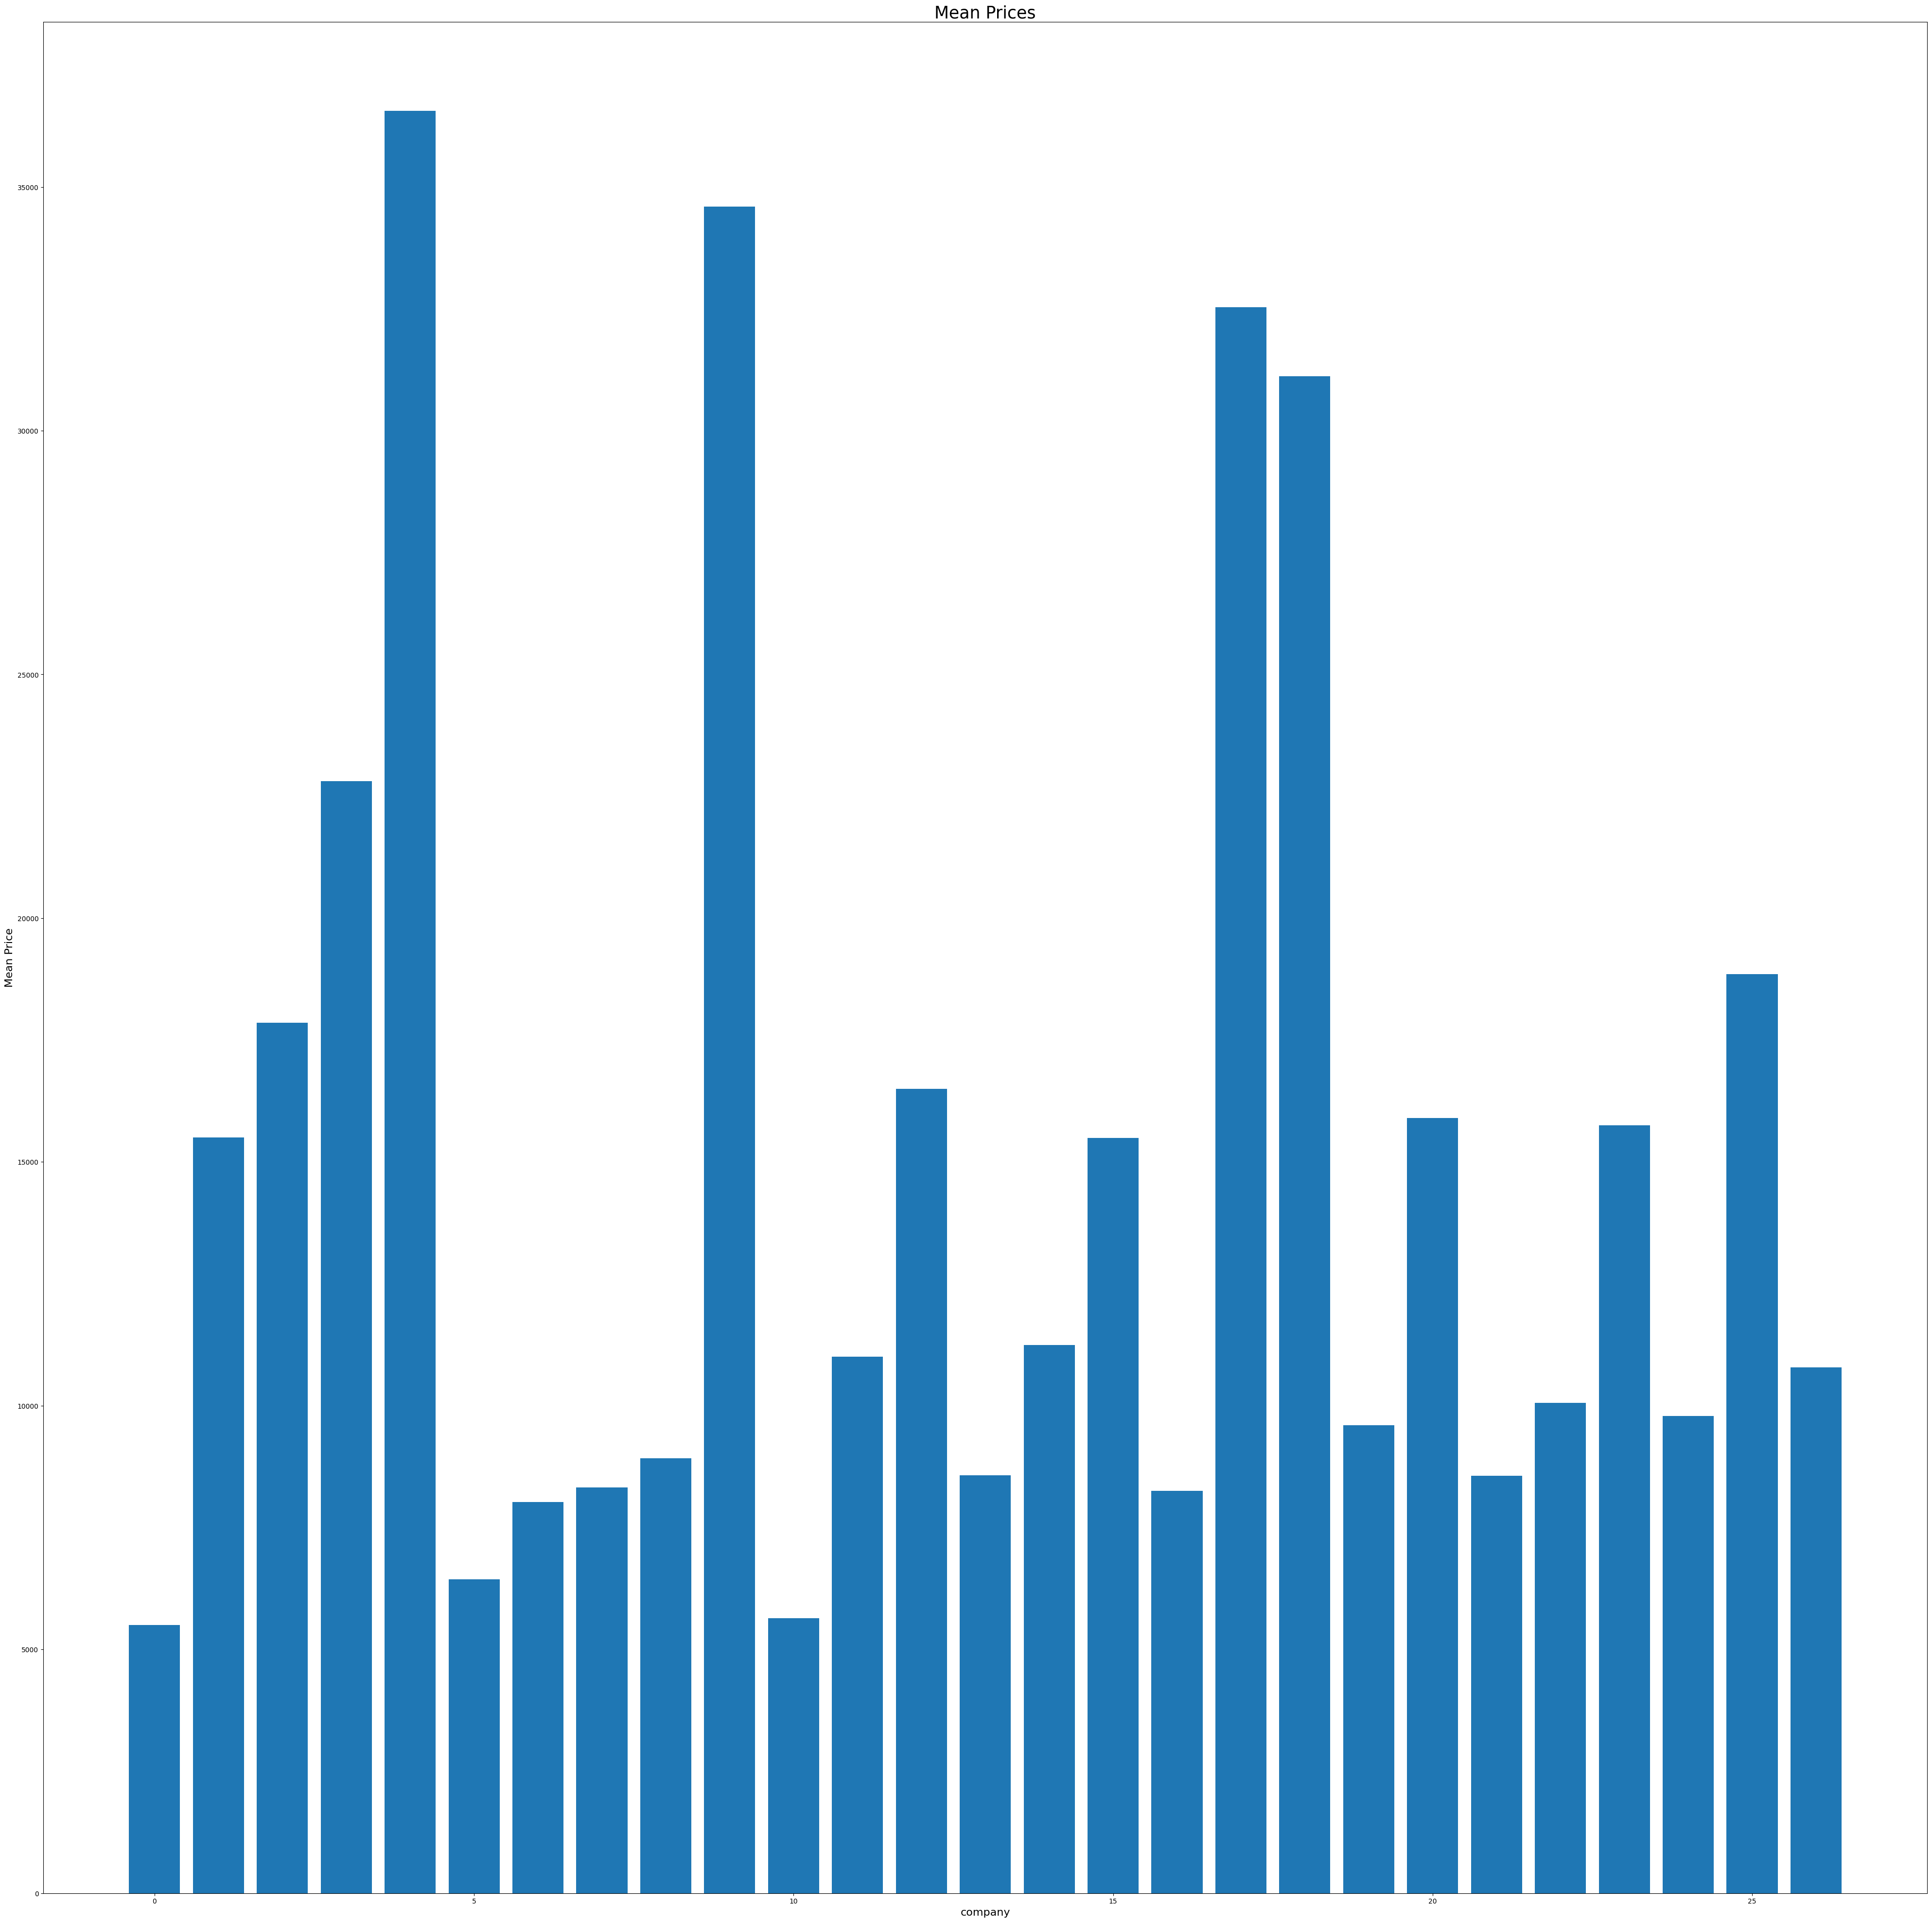

In [405]:
df_train['price'] = pd.to_numeric(df_train['price'].astype(str).str.replace(',', ''), errors='coerce')

# Calculate the mean price for Samsung
companies = df_train['company'].unique()
mean_prices = {}
for company in companies:
    mean_prices[company] = df_train[df_train['company'] == company]['price'].mean()

company_names = list(mean_prices.keys())
mean_price_values = list(mean_prices.values())
plt.figure(figsize=(50,50))
plt.bar(company_names, mean_price_values)

plt.xlabel('company', fontsize=16)
plt.ylabel('Mean Price', fontsize=16)
plt.title('Mean Prices', fontsize=25)

plt.show()

In [380]:
df_train = df_train.drop(columns='highwaympg')
df_test = df_test.drop(columns='highwaympg')

In [381]:
df_test = split_carname_column(df_test, 'CarName')
df_test = df_test.drop(columns="CarName")

In [382]:
df_train['doornumber'] = df_train['doornumber'].replace("four", 4)
df_train['doornumber'] = df_train['doornumber'].replace("two", 2)

C:\Users\71519\AppData\Local\Temp\ipykernel_11380\222864011.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['doornumber'] = df_train['doornumber'].replace("two", 2)


In [383]:
# df_test = split_carname_column(df_test, 'model')
# df_test

In [384]:
df_test['doornumber'] = df_test['doornumber'].replace("four", 4)
df_test['doornumber'] = df_test['doornumber'].replace("two", 2)

C:\Users\71519\AppData\Local\Temp\ipykernel_11380\1641953075.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['doornumber'] = df_test['doornumber'].replace("two", 2)


In [385]:
df_train['cylindernumber'] = df_train['cylindernumber'].replace("four", 4)
df_train['cylindernumber'] = df_train['cylindernumber'].replace("two", 2)
df_train['cylindernumber'] = df_train['cylindernumber'].replace("eight", 8)
df_train['cylindernumber'] = df_train['cylindernumber'].replace("twelve", 12)
df_train['cylindernumber'] = df_train['cylindernumber'].replace("five", 5)
df_train['cylindernumber'] = df_train['cylindernumber'].replace("six", 6)
df_train['cylindernumber'] = df_train['cylindernumber'].replace("three", 3)
df_train['cylindernumber'] = pd.to_numeric(df_train['cylindernumber'], errors='coerce')

C:\Users\71519\AppData\Local\Temp\ipykernel_11380\3334805780.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['cylindernumber'] = df_train['cylindernumber'].replace("six", 6)


In [386]:
df_test['cylindernumber'] = df_test['cylindernumber'].replace("four", 4)
df_test['cylindernumber'] = df_test['cylindernumber'].replace("two", 2)
df_test['cylindernumber'] = df_test['cylindernumber'].replace("eight", 8)
df_test['cylindernumber'] = df_test['cylindernumber'].replace("twelve", 12)
df_test['cylindernumber'] = df_test['cylindernumber'].replace("five", 5)
df_test['cylindernumber'] = df_test['cylindernumber'].replace("six", 6)
df_test['cylindernumber'] = df_test['cylindernumber'].replace("three", 3)
df_test['cylindernumber'] = pd.to_numeric(df_test['cylindernumber'], errors='coerce')

C:\Users\71519\AppData\Local\Temp\ipykernel_11380\2413355177.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['cylindernumber'] = df_test['cylindernumber'].replace("three", 3)


In [387]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [388]:
le = LabelEncoder()
classes = dict()
cat = df_test.select_dtypes(exclude = np.number).columns
for i in cat:
    df_test[i] = le.fit_transform(df_test[i])
    classes[i] = le.classes_
df_test

car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
15       16          0         1           0           4        2           2   
9        10          0         1           1           2        1           0   
100     101          0         1           0           4        2           1   
132     133          3         1           0           2        1           1   
68       69         -1         0           1           4        3           2   
95       96          1         1           0           2        1           1   
159     160          0         0           0           4        1           1   
162     163          0         1           0           4        2           1   
147     148          0         1           0           4        3           1   
182     183          2         0           0           2        2           1   
191     192          0         1           0           4        2           1   
164     165          1         1           0           2        1           2   
65       66          0         1           0           4        2           2   
175     176         -1         1           0           4        1           1   
73       74          0         1           0           4        2           2   
152     153          1         1           0           4        1           1   
18       19          2         1           0           2        1           1   
82       83          3         1           1           2        1           1   
86       87          1         1           0           4        2           1   
143     144          0         1           0           4        2           1   
60       61          0         1           0           4        2           1   
101     102          0         1           0           4        2           1   
98       99          2         1           0           2        0           1   
30       31          2         1           0           2        1           1   
25       26          1         1           0           4        2           1   
16       17          0         1           0           2        2           2   
168     169          2         1           0           2        0           2   
195     196         -1         1           0           4        3           2   
97       98          1         1           0           4        3           1   
194     195         -2         1           0           4        2           2   
67       68         -1         0           1           4        2           2   
120     121          1         1           0           4        1           1   
154     155          0         1           0           4        3           0   
202     203         -1         1           0           4        2           2   
79       80          1         1           1           2        1           1   
69       70          0         0           1           2        0           2   
145     146          0         1           1           4        2           0   
55       56          3         1           0           2        1           2   
45       46          0         1           0           4        2           1   
84       85          3         1           1           2        1           1   
146     147          0         1           0           4        3           1   

     enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
15                0      103.5      189.0  ...           4       3.62   3.390   
9                 0       99.5      178.2  ...           4       3.13   3.400   
100               0       97.2      173.4  ...           1       3.33   3.470   
132               0       99.1      186.6  ...           4       3.54   3.070   
68                0      110.0      190.9  ...           3       3.58   3.640   
95                0       94.5      165.6  ...           1       3.15   3.290   
159               0       95.7     

In [389]:
category = df_train.select_dtypes(exclude = np.number).columns
le = LabelEncoder()
classes = dict()
for i in category:
    df_train[i] = le.fit_transform(df_train[i])
    classes[i] = le.classes_
df_train

car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
66       67          0         0           0           4        3           2   
111     112          0         1           0           4        3           2   
153     154          0         1           0           4        4           1   
96       97          1         1           0           4        3           1   
38       39          0         1           0           2        2           1   
..      ...        ...       ...         ...         ...      ...         ...   
106     107          1         1           0           2        2           2   
14       15          1         1           0           4        3           2   
92       93          1         1           0           4        3           1   
179     180          3         1           0           2        2           2   
102     103          0         1           0           4        4           1   

     enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
66                0      104.9      175.0  ...           3       3.43    3.64   
111               0      107.9      186.7  ...           5       3.46    2.19   
153               0       95.7      169.7  ...           1       3.05    3.03   
96                0       94.5      165.3  ...           1       3.15    3.29   
38                0       96.5      167.5  ...           0       3.15    3.58   
..              ...        ...        ...  ...         ...        ...     ...   
106               0       99.2      178.5  ...           5       3.43    3.27   
14                0      103.5      189.0  ...           5       3.31    3.19   
92                0       94.5      165.3  ...           1       3.15    3.29   
179               0      102.9      183.5  ...           5       3.27    3.35   
102               0      100.4      184.6  ...           5       3.43    3.27   

     compressionratio  horsepower  peakrpm  citympg    price  company  model  
66               22.0          72     4200       31  18344.0       11     98  
111               8.4          95     5000       19  15580.0       15     16  
153               9.0          62     4800       31   6918.0       22     49  
96                9.4          69     5200       31   7499.0       14     76  
38                9.0          86     5800       27   9095.0        7     39  
..                ...         ...      ...      ...      ...      ...    ...  
106               9.0         160     5200       19  18399.0       14     42  
14                9.0         121     4250       20  24565.0        3    119  
92                9.4          69     5200       31   6849.0       14     76  
179               9.3         161     5200       19  15998.0       22     48  
102               9.0         152     5200       17  14399.0       14     64  

[162 rows x 26 columns]

In [390]:
x_train = df_train.drop(columns = 'price').values
x_train

array([[ 67.,   0.,   0., ...,  31.,  11.,  98.],
       [112.,   0.,   1., ...,  19.,  15.,  16.],
       [154.,   0.,   1., ...,  31.,  22.,  49.],
       ...,
       [ 93.,   1.,   1., ...,  31.,  14.,  76.],
       [180.,   3.,   1., ...,  19.,  22.,  48.],
       [103.,   0.,   1., ...,  17.,  14.,  64.]])

In [391]:
y_train = df_train['price'].values
y_train

array([18344. , 15580. ,  6918. ,  7499. ,  9095. ,  6229. ,  7053. ,
       16900. , 12964. ,  6295. , 16558. ,  7099. ,  8948. ,  7349. ,
       15250. ,  8449. , 11845. , 37028. ,  5389. ,  9233. , 17199. ,
       11248. , 16503. , 10698. ,  6855. , 20970. ,  7295. , 22018. ,
       10345. ,  6938. , 18150. ,  7603. ,  6095. , 16695. ,  9538. ,
       12945. , 12764. ,  6669. ,  7957. ,  7609. , 18620. , 16845. ,
       18150. , 16500. ,  6189. , 11048. ,  7609. , 34028. ,  6989. ,
        7295. , 17075. , 10595. ,  6377. , 15510. , 13845. ,  6529. ,
       16925. , 18950. ,  8058. , 17710. ,  8558. , 32528. , 15985. ,
       17450. ,  5399. , 12440. ,  9495. , 16630. ,  8013. , 16430. ,
       10245. ,  5572. ,  5348. , 11199. , 13495. ,  7995. ,  7975. ,
       31600. , 22470. , 11245. ,  8916.5,  9298. ,  8921. , 10295. ,
       13200. ,  8921. ,  7957. ,  8778. , 11595. ,  8499. ,  8845. ,
       17669. , 32250. ,  7299. ,  7898. ,  6785. ,  7775. , 13950. ,
       19699. ,  669

In [392]:
x_test = df_test.drop(columns = 'price').values

In [393]:
y_test = df_test['price'].values

In [394]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [395]:
y_pred = reg.predict(x_test)

In [396]:
y_pred[:10]

array([25887.68555775, 17756.75595174, 10830.27048973, 14968.81298259,
       26920.96335202,  7231.03721744,  9510.56692449,  7641.36838601,
       11746.35048811,  8858.81609298])

In [397]:
y_test[:10]

array([30760.   , 17859.167,  9549.   , 11850.   , 28248.   ,  7799.   ,
        7788.   ,  9258.   , 10198.   ,  7775.   ])

In [398]:

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.8290314667925509, 13496943.455293313, 2483.3311068080343)

In [399]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

In [400]:

r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)


(0.8299729511325482, 13422618.895898689, 2570.5642170779356)

In [401]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

lasso = Lasso(alpha=0.1)  # You might need to adjust alpha based on your specific dataset
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [402]:
y_pred = lasso.predict(X_test_scaled)

In [403]:

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.8292025540371792, 13483437.140281124, 2481.652854779852)